In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [66]:
class Model(nn.Module):

    # The neuron numbers in the input layer should be the same number of features
    # in practice, in hidden layers, the number of neurons could be at least the same number or features.
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        # how many layers?
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        

        # input layer (4 features) --> h1 N --> h2 N --> output (3 classes)
        pass

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return x

In [67]:
torch.manual_seed(32)
model = Model()

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
df = pd.read_csv('../Data/iris.csv')

In [70]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [71]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


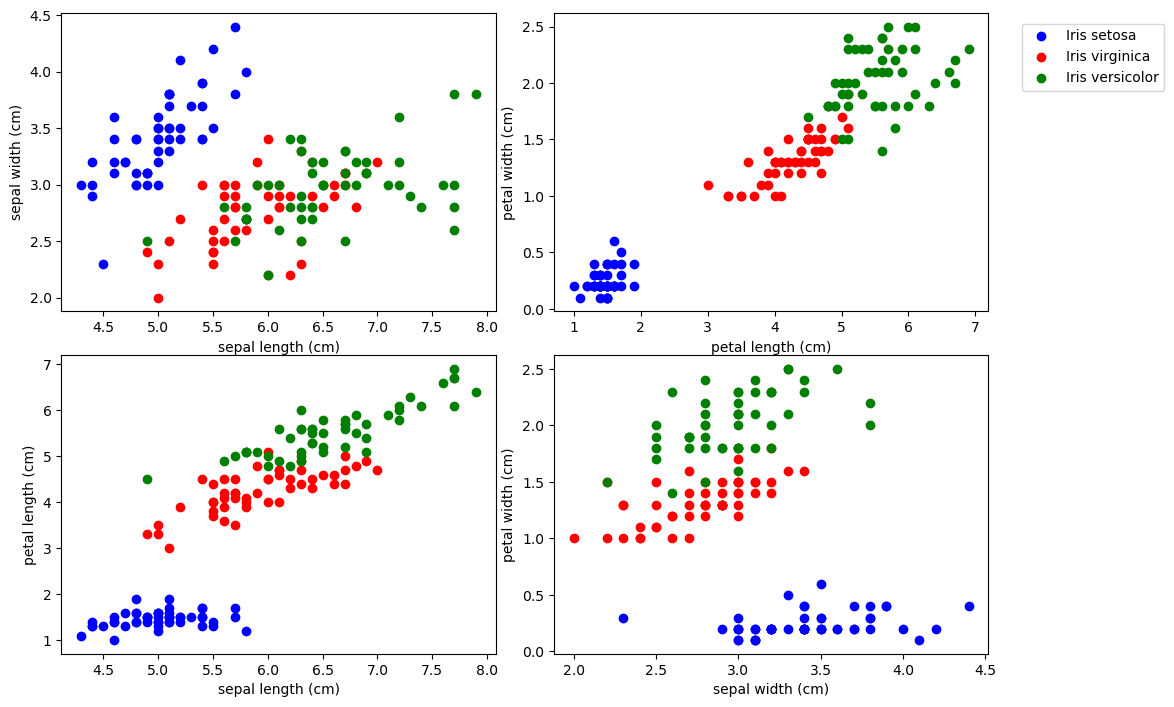

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [72]:
X = df.drop('target', axis=1)
y = df['target']

In [73]:
X = X.values
y = y.values

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [76]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [77]:
y_train = torch.LongTensor(y_train)

In [78]:
y_test = torch.LongTensor(y_test)

In [79]:

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [80]:
model.parameters()

<generator object Module.parameters at 0x000001CBDA0EB680>

In [81]:
# Epochs: one epoch is one run through all the training data

epochs = 500
losses = []

for i in range (epochs):

    y_pred = model.forward(X_train)

    # calculate loss, because we are doing CrossEntropyLoss, we don't need to do one-hot encoding between y_pred and y_train
    loss = criterion(y_pred, y_train)

    losses.append(loss)

    if i%10==0:
        print(f'Epoch {i} and loss is: {loss}')

    # Backpropagation

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch 0 and loss is: 1.1507114171981812
Epoch 10 and loss is: 0.9377314448356628
Epoch 20 and loss is: 0.7798256278038025
Epoch 30 and loss is: 0.6099401712417603
Epoch 40 and loss is: 0.40079933404922485
Epoch 50 and loss is: 0.2543632388114929
Epoch 60 and loss is: 0.15053054690361023
Epoch 70 and loss is: 0.10086948424577713
Epoch 80 and loss is: 0.08128314465284348
Epoch 90 and loss is: 0.07231428474187851
Epoch 100 and loss is: 0.067133329808712
Epoch 110 and loss is: 0.06355974823236465
Epoch 120 and loss is: 0.060853805392980576
Epoch 130 and loss is: 0.058709874749183655
Epoch 140 and loss is: 0.056958481669425964
Epoch 150 and loss is: 0.055492304265499115
Epoch 160 and loss is: 0.0542379654943943
Epoch 170 and loss is: 0.05314471945166588
Epoch 180 and loss is: 0.052177563309669495
Epoch 190 and loss is: 0.051312293857336044
Epoch 200 and loss is: 0.050531480461359024
Epoch 210 and loss is: 0.049821846187114716
Epoch 220 and loss is: 0.04917295649647713
Epoch 230 and loss is:

In [82]:
# Convert list of tensors to a list of NumPy arrays
losses = [loss.detach().cpu().numpy() if isinstance(loss, torch.Tensor) else loss for loss in losses]

Text(0.5, 0, 'Epoch')

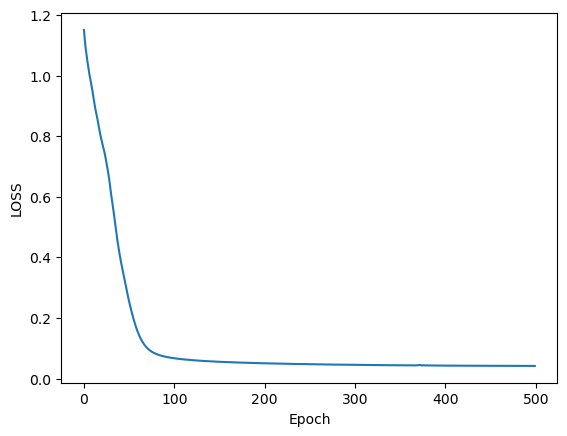

In [83]:
plt.plot(range(epochs), losses)
plt.ylabel('LOSS')
plt.xlabel('Epoch')

### Evaluate the model

In [84]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)

In [85]:
loss

tensor(0.0473)

In [93]:
correct = 0

with torch.no_grad():

    for i, data in enumerate(X_test):

        y_val = model.forward(data)

        print(f'{i+1}.) {y_val.argmax().item()} {y_test[i]}')

        if y_val.argmax().item() == y_test[i]:
            correct += 1

print(f'We got {correct} correct!')

1.) 1 1
2.) 1 1
3.) 0 0
4.) 1 1
5.) 2 2
6.) 2 2
7.) 0 0
8.) 0 0
9.) 2 2
10.) 2 2
11.) 2 2
12.) 0 0
13.) 2 2
14.) 1 1
15.) 2 2
16.) 1 1
17.) 2 2
18.) 0 0
19.) 1 1
20.) 2 2
21.) 0 0
22.) 0 0
23.) 2 2
24.) 0 0
25.) 2 2
26.) 2 2
27.) 1 1
28.) 1 1
29.) 2 2
30.) 2 2
We got 30 correct!


In [94]:
torch.save(model.state_dict(), 'my_iris_model_sm.pt')

In [95]:
new_model = Model()
new_model.load_state_dict(torch.load('my_iris_model_sm.pt'))

<All keys matched successfully>

In [96]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

### How to use the model on unseen dataset?

In [101]:
mystery_iris = torch.tensor([3.5, 4.2, 2.6, 0.4])

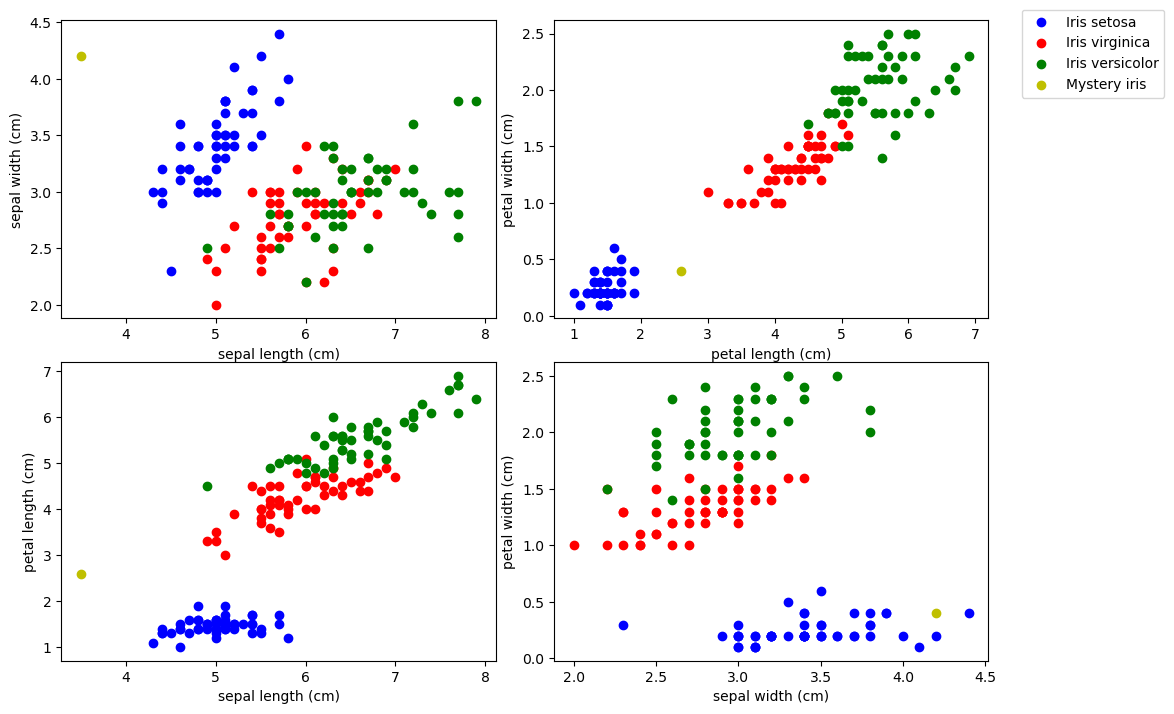

In [102]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor','Mystery iris']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)
        
    # Add a plot for our mystery iris:
    ax.scatter(mystery_iris[plots[i][0]],mystery_iris[plots[i][1]], color='y')
    
fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [103]:
with torch.no_grad():
    print(new_model(mystery_iris))
    print(new_model(mystery_iris).argmax())

tensor([  7.2761,   2.2636, -11.5742])
tensor(0)
